## Load libraries

In [112]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier# Import Decision Tree Classifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn. preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,roc_curve, auc
from sklearn.model_selection import train_test_split # Import train_test_split function
import matplotlib.pyplot as plt
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [113]:
df = pd.read_csv('X_choc.csv')

In [114]:
df.head()

,Unnamed: 0,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impuslive,ss,chocolate
0,0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,user
1,1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,user
2,2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,user
3,3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,user
4,4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,user


## split dataset in features and target variable

In [116]:

feature_cols = ['age', 'gender', 'education', 'country','ethnicity','nscore','escore','oscore','ascore','cscore','impuslive','ss']
X = df[feature_cols] # Features
y = df.chocolate # Target variable


## Split dataset into training set and test set

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Decision Tree Classifier

In [120]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [121]:
accuracy_DT = accuracy_score(y_test, y_pred)
precision_DT = precision_score(y_test, y_pred, pos_label="user")
recall_DT = recall_score(y_test, y_pred, pos_label="user")

print("Accuracy_DT:",accuracy_DT)
print("Precision_DT:", precision_DT)
print("Recall_DT:", recall_DT)

Accuracy_DT: 0.9611307420494699
Precision_DT: 0.9730700179533214
Recall_DT: 0.9872495446265938


In [181]:
cm_DT = confusion_matrix(y_test, y_pred)
print(cm_DT)

[[  0  17]
 [  1 548]]


## Random Forest Learner

In [124]:
# Create Random Forest classifer object
rf = RandomForestClassifier()

# Train Random Forest Classifer
rf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = rf.predict(X_test)

In [125]:
accuracy_RF = accuracy_score(y_test, y_pred)
precision_RF = precision_score(y_test, y_pred, pos_label="user")
recall_RF = recall_score(y_test, y_pred, pos_label="user")

print("Accuracy_RF:" , accuracy_RF)
print("Precision_DT:", precision_DT)
print("Recall_DT:", recall_DT)

Accuracy_RF: 0.9699646643109541
Precision_DT: 0.9730700179533214
Recall_DT: 0.9872495446265938


In [126]:
cm_RF = confusion_matrix(y_test, y_pred)
print(cm_RF)

[[  0  17]
 [  0 549]]


# Support Vector Machine

In [128]:
#Create a svm Classifier object
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [129]:
accuracy_SVM = accuracy_score(y_test, y_pred)
precision_SVM = precision_score(y_test, y_pred, pos_label="user")
recall_SVM = recall_score(y_test, y_pred, pos_label="user")

print(f"Accuracy_SVM: {round(accuracy_SVM*100, 2)}")
print("Precision_SVM:", precision_SVM)
print("Recall_SVM:", recall_SVM)

Accuracy_SVM: 97.0
Precision_SVM: 0.9699646643109541
Recall_SVM: 1.0


In [130]:
cm_SVM = confusion_matrix(y_test, y_pred)
print(cm_SVM)

[[  0  17]
 [  0 549]]


# KNN

In [132]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [133]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [134]:
accuracy_KNN = accuracy_score(y_test, y_pred)
precision_KNN = precision_score(y_test, y_pred, pos_label="user")
recall_KNN = recall_score(y_test, y_pred, pos_label="user")

print(f"Accuracy_KNN: {round(accuracy_KNN*100, 2)}")
print("Precision_KNN:", precision_KNN)
print("Recall_KNN:", recall_KNN)

Accuracy_KNN: 96.64
Precision_KNN: 0.9698581560283688
Recall_KNN: 0.9963570127504554


In [135]:
cm_KNN = confusion_matrix(y_test, y_pred)
print(cm_KNN)

[[  0  17]
 [  2 547]]


# Multi Layer Perceptron

In [137]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [138]:
y_pred = clf.predict(X_test)
accuracy_MLP = accuracy_score(y_test, y_pred)
precision_MLP = precision_score(y_test, y_pred, pos_label="user")
recall_MLP = recall_score(y_test, y_pred, pos_label="user")

print(f"Accuracy_MLP: {round(accuracy_MLP*100, 2)}")
print("Precision_MLP:", precision_MLP)
print("Recall_MLP:", recall_MLP)

Accuracy_MLP: 96.29
Precision_MLP: 0.9697508896797153
Recall_MLP: 0.9927140255009107


In [139]:
cm_MLP = confusion_matrix(y_test, y_pred)
print(cm_MLP) 

[[  0  17]
 [  4 545]]


## GB

In [141]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [142]:
accuracy_GB = accuracy_score(y_test, y_pred)
precision_GB = precision_score(y_test, y_pred, pos_label="user")
recall_GB = recall_score(y_test, y_pred, pos_label="user")

print(f"Accuracy_GB: {round(accuracy_GB*100, 2)}")
print("Precision_GB:", precision_GB)
print("Recall_GB:", recall_GB)

Accuracy_GB: 96.82
Precision_GB: 0.9699115044247788
Recall_GB: 0.9981785063752276


In [143]:
cm_GB = confusion_matrix(y_test, y_pred)
print(cm_GB) 

[[  0  17]
 [  1 548]]


## ROC CURVE

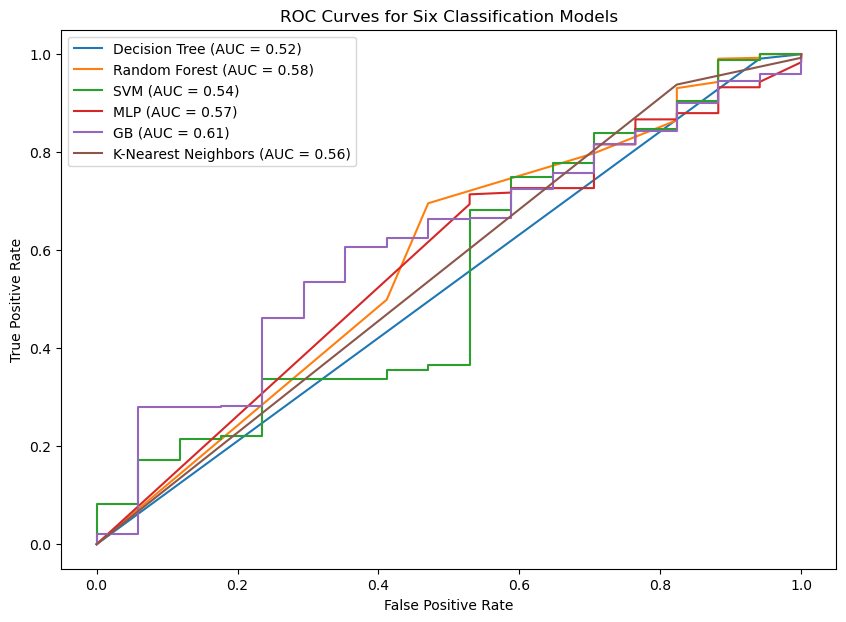

In [174]:
# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': svm.SVC(probability=True),
    'MLP': MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1),
    'GB': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Plotting the ROC curves
plt.figure(figsize=(10, 7))

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label = 'user')
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Six Classification Models')
plt.legend()

# Display the plot
plt.show()